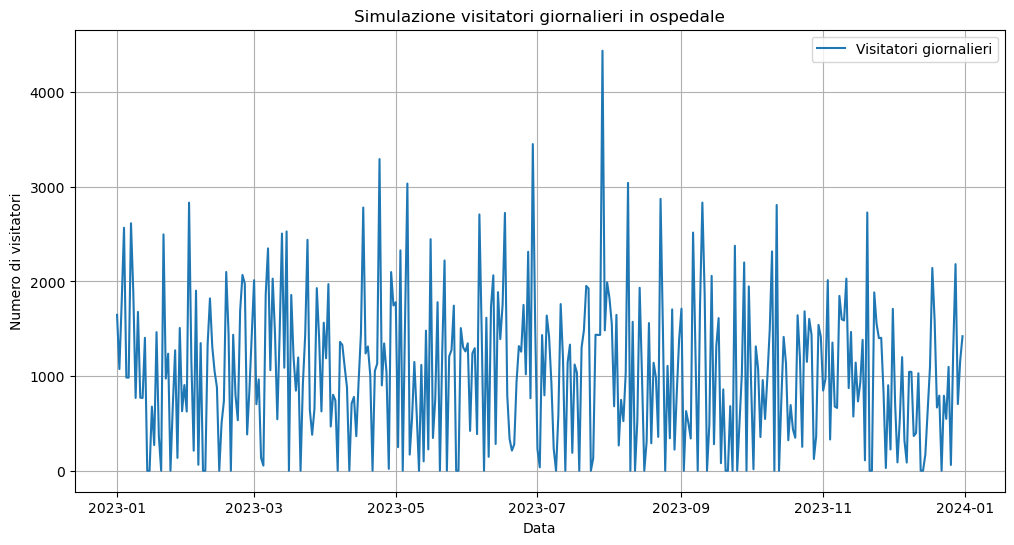

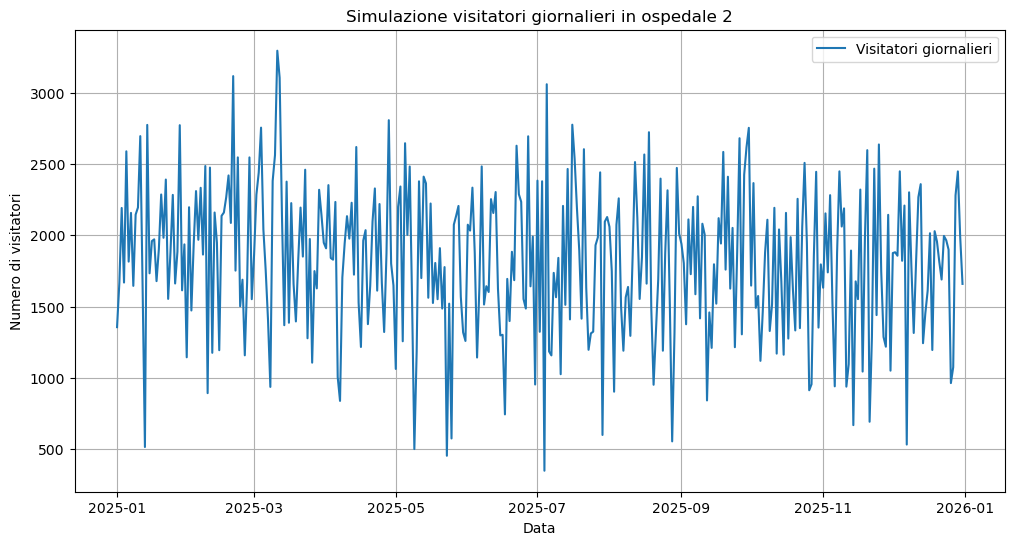

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#____________________________________________________________________________________________________

date_range = pd.date_range(start='2025-01-01', periods=365, freq='D')
numeri_casuali = np.random.normal(loc=2000, scale=500, size=365)
visitatori_decrescente = numeri_casuali + np.linspace(0, -400, 365)
numeri_casuali_clip = np.clip(visitatori_decrescente, 0, None)
patologia_casuale = np.random.choice(["ossa","cuore","testa"], size=365)

# Creare il DataFrame con la colonna dei giorni
data = {
    'Giorno': date_range,
    'Visitatori' : numeri_casuali_clip,
    'Patologia' : patologia_casuale
}

testdf = pd.DataFrame(data)


#____________________________________________________________________________________________________
# Parametri
n_giorni = 365
media = 1200
dev_std = 900

# Genera la serie di visitatori con rumore casuale
np.random.seed(42)  # Per riproducibilità
visitatori = np.random.normal(loc=media, scale=dev_std, size=n_giorni)

# Aggiungi un trend decrescente (es. diminuzione lineare)
trend_decrescente = np.linspace(0, -400, n_giorni)
visitatori_con_trend = visitatori + trend_decrescente

# Assicura che il numero di visitatori non sia negativo
visitatori_con_trend = np.clip(visitatori_con_trend, 0, None)

# Crea un DataFrame con le date come colonna
date = pd.date_range(start="2023-01-01", periods=n_giorni)
patologie = np.random.choice(["ossa", "cuore", "testa"], size=n_giorni)
df = pd.DataFrame({"dates": date, "Visitatori": visitatori_con_trend, "Patologia": patologie})

# Visualizza il DataFrame
# print(df.head())
# print(testdf)

# Visualizza il risultato
plt.figure(figsize=(12, 6))
plt.plot(df["dates"], df["Visitatori"], label="Visitatori giornalieri")
plt.title("Simulazione visitatori giornalieri in ospedale")
plt.xlabel("Data")
plt.ylabel("Numero di visitatori")
plt.legend()
plt.grid(True)
plt.show()

# Visualizza il risultato
plt.figure(figsize=(12, 6))
plt.plot(testdf["Giorno"], testdf["Visitatori"], label="Visitatori giornalieri")
plt.title("Simulazione visitatori giornalieri in ospedale 2")
plt.xlabel("Data")
plt.ylabel("Numero di visitatori")
plt.legend()
plt.grid(True)
plt.show()



In [2]:
df['month'] = df['dates'].dt.to_period('M')
media_visitatori_mese = df.groupby('month')['Visitatori'].mean()
print('\n',media_visitatori_mese)
std_visitatori_mese = df.groupby('month')['Visitatori'].std()
print('\n',std_visitatori_mese)
count_patologie = df.groupby('Patologia')['Visitatori'].count()
print('\n',count_patologie)

print('\n',"---------------------------------------------------------------")

testdf['Mese'] = testdf['Giorno'].dt.to_period('M')
media_visitatori_mese = testdf.groupby('Mese')['Visitatori'].mean()
print('\n',media_visitatori_mese)
std_visitatori_mese = testdf.groupby('Mese')['Visitatori'].std()
print('\n',std_visitatori_mese)
count_patologie = testdf.groupby('Patologia')['Visitatori'].count()
print('\n',count_patologie)


 month
2023-01    1037.776064
2023-02    1067.286419
2023-03    1219.990801
2023-04    1102.040240
2023-05    1015.642161
2023-06    1281.821713
2023-07    1099.436126
2023-08     999.594919
2023-09     961.913333
2023-10     977.338351
2023-11    1069.693034
2023-12     801.592043
Freq: M, Name: Visitatori, dtype: float64

 month
2023-01    744.729793
2023-02    768.374959
2023-03    759.862235
2023-04    754.723880
2023-05    855.901658
2023-06    850.163017
2023-07    906.621603
2023-08    798.904452
2023-09    912.330671
2023-10    687.324714
2023-11    685.191914
2023-12    607.258144
Freq: M, Name: Visitatori, dtype: float64

 Patologia
cuore    126
ossa     124
testa    115
Name: Visitatori, dtype: int64

 ---------------------------------------------------------------

 Mese
2025-01    1925.132901
2025-02    1964.226937
2025-03    1994.594642
2025-04    1848.768615
2025-05    1710.738451
2025-06    1804.506369
2025-07    1794.849674
2025-08    1746.935421
2025-09    1890.33595

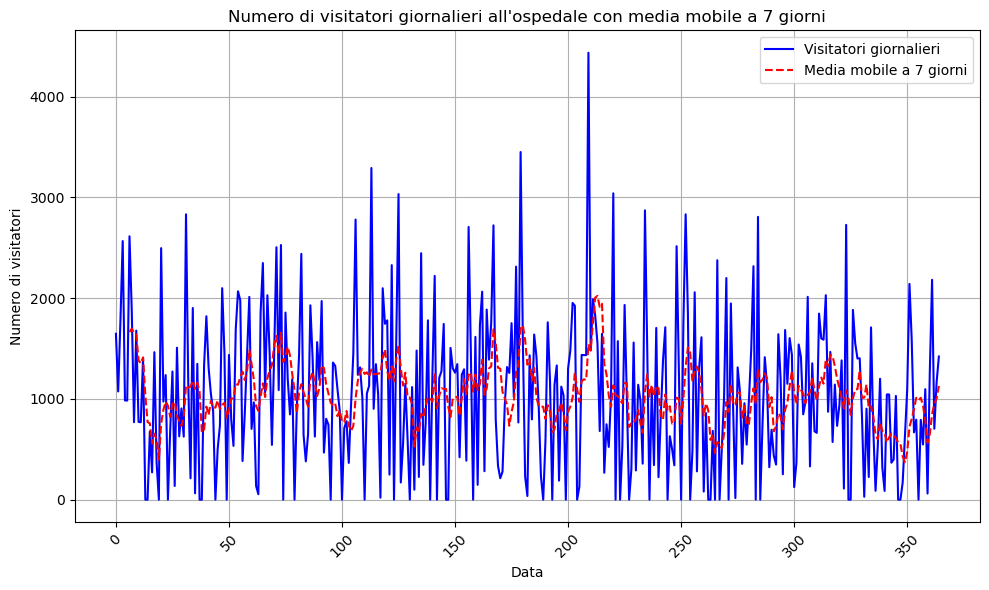

In [3]:
# Calcolo della media mobile a 7 giorni
df['Media_mobile_7gg'] = df['Visitatori'].rolling(window=7).mean()

# Grafico del numero di visitatori giornalieri con la media mobile a 7 giorni
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Visitatori'], label='Visitatori giornalieri', color='b')
plt.plot(df.index, df['Media_mobile_7gg'], label='Media mobile a 7 giorni', color='r', linestyle='--')
plt.title('Numero di visitatori giornalieri all\'ospedale con media mobile a 7 giorni')
plt.xlabel('Data')
plt.ylabel('Numero di visitatori')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

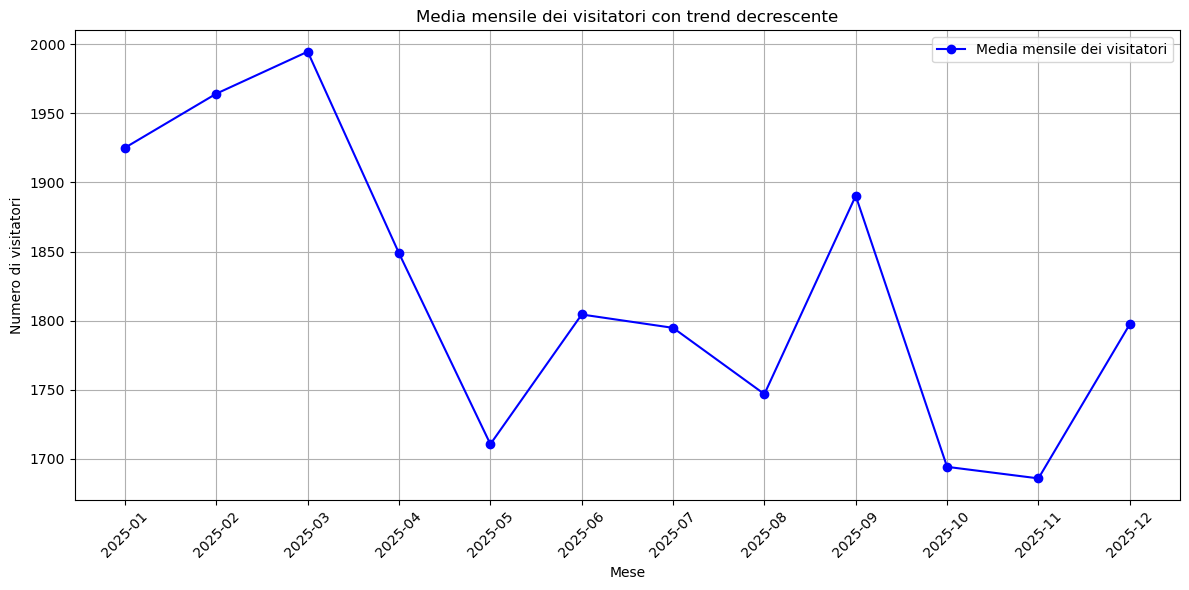

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(media_visitatori_mese.index.astype(str), media_visitatori_mese, marker='o', label="Media mensile dei visitatori", color='b')
plt.title("Media mensile dei visitatori con trend decrescente")
plt.xlabel("Mese")
plt.ylabel("Numero di visitatori")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

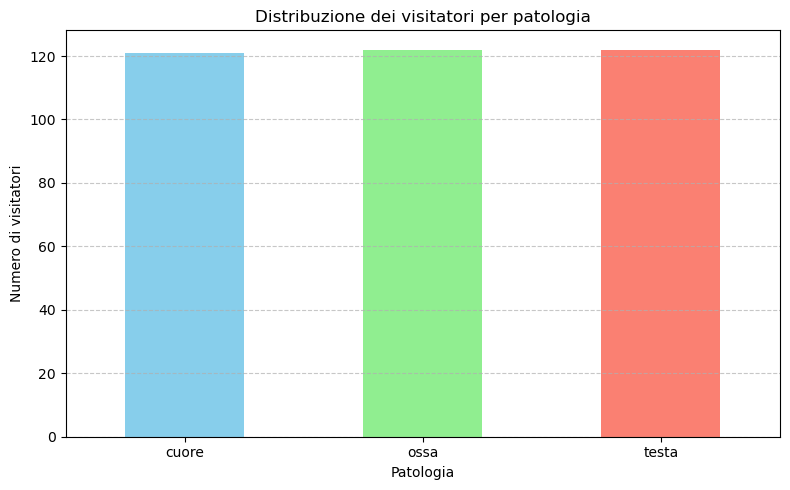

In [5]:
plt.figure(figsize=(8, 5))
count_patologie.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Distribuzione dei visitatori per patologia")
plt.xlabel("Patologia")
plt.ylabel("Numero di visitatori")
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()